In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
import joblib
import tensorflow as tf
import os
import warnings
warnings.filterwarnings("ignore")

### Reading the Dataset

In [4]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


### Data Preprocessing

In [5]:
df_1 = df.drop(columns="Unnamed: 0")
df_1.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [6]:
(df_1.isna().sum() * 100 / len(df_1)).round(2)

cut                             0.00
color                           0.00
clarity                         0.00
carat_weight                    0.00
cut_quality                     0.00
lab                             0.00
symmetry                        0.00
polish                          0.00
eye_clean                       0.00
culet_size                      0.00
culet_condition                 0.00
depth_percent                   0.00
table_percent                   0.00
meas_length                     0.00
meas_width                      0.00
meas_depth                      0.00
girdle_min                      0.00
girdle_max                      0.00
fluor_color                     0.00
fluor_intensity                65.31
fancy_color_dominant_color      0.00
fancy_color_secondary_color     0.00
fancy_color_overtone            0.75
fancy_color_intensity           0.00
total_sales_price               0.00
dtype: float64

In [7]:
df_1.duplicated().sum()

3880

In [8]:
df_2 = df_1.drop_duplicates()
df_2.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [9]:
pp = df_2.dtypes.reset_index()
data_types_dict = {pp.loc[i,"index"]:str(pp.loc[i,0]) for i in range(len(pp.index))}
data_types_dict

{'cut': 'object',
 'color': 'object',
 'clarity': 'object',
 'carat_weight': 'float64',
 'cut_quality': 'object',
 'lab': 'object',
 'symmetry': 'object',
 'polish': 'object',
 'eye_clean': 'object',
 'culet_size': 'object',
 'culet_condition': 'object',
 'depth_percent': 'float64',
 'table_percent': 'float64',
 'meas_length': 'float64',
 'meas_width': 'float64',
 'meas_depth': 'float64',
 'girdle_min': 'object',
 'girdle_max': 'object',
 'fluor_color': 'object',
 'fluor_intensity': 'object',
 'fancy_color_dominant_color': 'object',
 'fancy_color_secondary_color': 'object',
 'fancy_color_overtone': 'object',
 'fancy_color_intensity': 'object',
 'total_sales_price': 'int64'}

In [58]:
non_numeric_types = []
numeric_types = []
list_of_features_1 = ""
list_of_features_2 = ""

for i in data_types_dict:
    list_of_features_1 += (i + ", ")
    list_of_features_2 += (data_types_dict[i] + ", ")
    if data_types_dict[i] == "object":
        non_numeric_types.append(i)
    else:
        numeric_types.append(i)
numeric_types_float = numeric_types[0:len(numeric_types)-1]
numeric_types_int = numeric_types[len(numeric_types)-1]

list_of_features_1 = list_of_features_1[:list_of_features_1.rindex(", ")]
list_of_features_2 = list_of_features_2[:list_of_features_2.rindex(", ")]

with open(file="model/list_of_features.txt",mode="w+") as fl:
    fl.writelines(list_of_features_1)
    fl.writelines(list_of_features_2)

In [59]:
data_types_dict

{'cut': 'object',
 'color': 'object',
 'clarity': 'object',
 'carat_weight': 'float64',
 'cut_quality': 'object',
 'lab': 'object',
 'symmetry': 'object',
 'polish': 'object',
 'eye_clean': 'object',
 'culet_size': 'object',
 'culet_condition': 'object',
 'depth_percent': 'float64',
 'table_percent': 'float64',
 'meas_length': 'float64',
 'meas_width': 'float64',
 'meas_depth': 'float64',
 'girdle_min': 'object',
 'girdle_max': 'object',
 'fluor_color': 'object',
 'fluor_intensity': 'object',
 'fancy_color_dominant_color': 'object',
 'fancy_color_secondary_color': 'object',
 'fancy_color_overtone': 'object',
 'fancy_color_intensity': 'object',
 'total_sales_price': 'int64'}

In [49]:
df_3 = df_2.copy()
for i in non_numeric_types:
    le = LabelEncoder()
    df_3[i] = le.fit_transform(df_2[i])
    joblib.dump(value=le,filename="model/"+i+".joblib")

In [12]:
df_3.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,7,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,7,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,7,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,7,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,7,12,10,7,9,200


### Outlier Detection

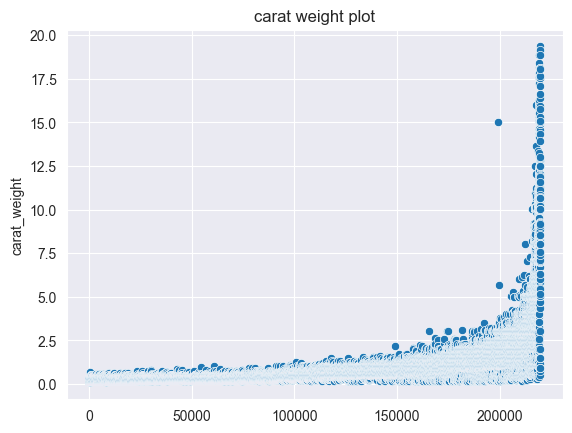

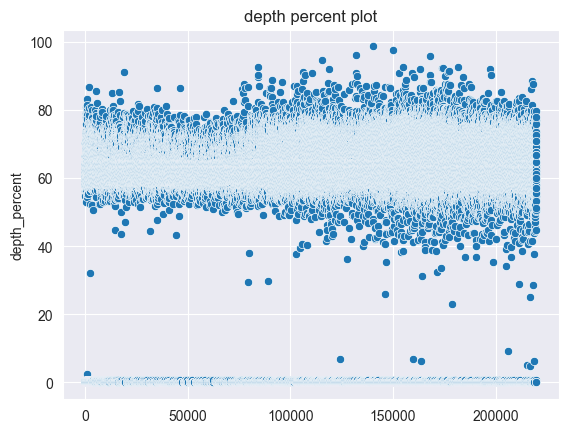

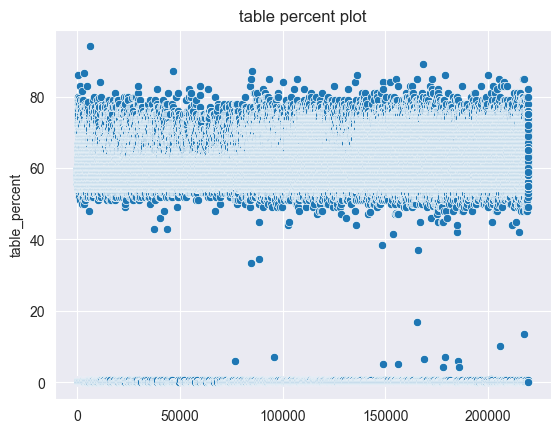

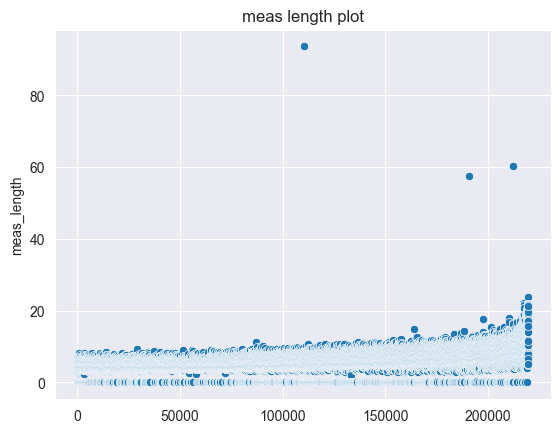

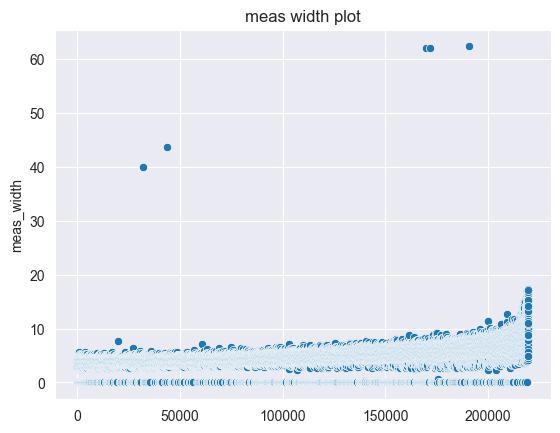

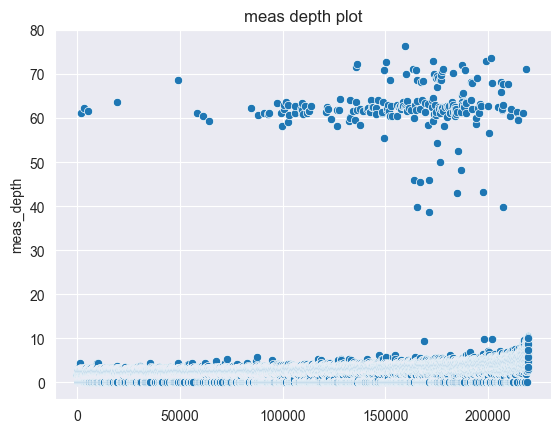

In [13]:
for i in numeric_types_float:
    sns.scatterplot(data=df_3[i])
    plt.title(" ".join(i.split("_"))+" plot")
    plt.show()

In [14]:
cond_1 = df_3["depth_percent"] >= 40
cond_2 = df_3["depth_percent"] < 85

cond_3 = df_3["table_percent"] >= 50
cond_4 = df_3["table_percent"] < 80

cond_5 = df_3["meas_length"] < 30
cond_6 = df_3["meas_width"] < 20

cond_7 = df_3["meas_depth"] < 10

cond_8 = df_3["depth_percent"] != 0

cond_9 = df_3["table_percent"] != 0

cond_10 = df_3["meas_length"] != 0
cond_11 = df_3["meas_width"] != 0

cond_12 = df_3["meas_depth"] != 0

cond = cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6 & cond_7 & cond_8 & cond_9 & cond_10 & cond_11 & cond_12

df_4 = df_3[cond].reset_index(drop=True)
df_4

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,7,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,7,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,7,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,7,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,7,12,10,7,9,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209114,6,10,7,10.04,5,0,0,0,4,8,...,7.90,9,9,5,7,11,10,7,6,1161102
209115,10,1,7,10.65,0,0,0,0,4,3,...,8.66,0,1,5,7,12,10,7,9,1210692
209116,9,10,8,5.17,5,0,4,4,4,8,...,5.71,3,7,5,7,5,10,8,5,1292500
209117,8,10,5,0.90,5,0,2,2,4,3,...,3.47,8,5,5,0,10,10,7,1,1350000


### Feature selection and Data splitting

In [15]:
X = df_4.drop(columns="total_sales_price")
y = df_4["total_sales_price"]

In [16]:
mms = MinMaxScaler()
X_res = pd.DataFrame(mms.fit_transform(X), columns=X.columns)
X_res.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
0,1.0,0.1,1.0,0.000519,0.0,1.0,1.0,1.0,1.0,0.375,...,0.158145,0.135394,0.000000,0.000000,1.0,1.0,1.0,1.0,0.875,1.0
1,1.0,0.1,1.0,0.000519,0.8,1.0,1.0,1.0,1.0,0.375,...,0.159334,0.134328,0.111111,0.111111,1.0,1.0,1.0,1.0,0.875,1.0
2,1.0,0.1,1.0,0.000519,0.0,1.0,1.0,1.0,1.0,1.000,...,0.159929,0.133262,0.444444,0.000000,1.0,1.0,1.0,1.0,0.875,1.0
3,1.0,0.1,1.0,0.000519,0.0,1.0,1.0,1.0,1.0,1.000,...,0.158740,0.134328,0.000000,0.111111,1.0,1.0,1.0,1.0,0.875,1.0
4,1.0,0.1,1.0,0.000519,0.8,1.0,1.0,0.0,1.0,0.375,...,0.155767,0.138593,0.111111,0.111111,1.0,1.0,1.0,1.0,0.875,1.0


In [17]:
f_regr = f_regression(X_res,y)
f_res = pd.DataFrame(columns=["columns","f-values","p-values"])
f_res["columns"] = X_res.columns
f_res["f-values"] = f_regr[0]
f_res["p-values"] = f_regr[1].round(2)
features_order = f_res.sort_values(by="f-values",ascending=False).reset_index(drop=True)
best_features = features_order["columns"].values[0:15]
print(best_features)

['carat_weight' 'meas_depth' 'meas_width' 'meas_length' 'cut'
 'fancy_color_intensity' 'table_percent' 'fancy_color_dominant_color'
 'cut_quality' 'color' 'eye_clean' 'depth_percent' 'fluor_color'
 'fancy_color_secondary_color' 'culet_condition']


In [18]:
X_res_2 = X_res[best_features]
X_res_2.head()

,carat_weight,meas_depth,meas_width,meas_length,cut,fancy_color_intensity,table_percent,fancy_color_dominant_color,cut_quality,color,eye_clean,depth_percent,fluor_color,fancy_color_secondary_color,culet_condition
0,0.000519,0.135394,0.158145,0.117746,1.0,1.0,0.301003,1.0,0.0,0.1,1.0,0.505568,1.0,1.0,1.0
1,0.000519,0.134328,0.159334,0.117325,1.0,1.0,0.301003,1.0,0.8,0.1,1.0,0.487751,1.0,1.0,1.0
2,0.000519,0.133262,0.159929,0.119008,1.0,1.0,0.301003,1.0,0.0,0.1,1.0,0.469933,1.0,1.0,1.0
3,0.000519,0.134328,0.158740,0.118167,1.0,1.0,0.301003,1.0,0.0,0.1,1.0,0.489978,1.0,1.0,1.0
4,0.000519,0.138593,0.155767,0.115223,1.0,1.0,0.284281,1.0,0.8,0.1,1.0,0.554566,1.0,1.0,1.0


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_res_2,y,test_size=0.2,random_state=np.random.randint(0,1000))

### Modelling the Regression

In [20]:
linear_regr = LinearRegression()
linear_regr.fit(X_train,y_train)
y_pred = linear_regr.predict(X_test)

In [21]:
intercept = round(linear_regr.intercept_,2)
coefficients = [i.round(2) for i in linear_regr.coef_]
print(intercept)
print(coefficients)

45578.08
[749504.75, -199654.96, 98292.19, -71014.67, 6476.16, 233.3, -9729.22, -29050.36, 34.31, -8071.85, 917.7, 18874.62, 211.73, 1838.73, -3225.28]


In [22]:
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) * 100

print("Mean Absolute Error : ",round(mae,2))
print("R2 score            : ",round(r2,2))

Mean Absolute Error :  3922.53
R2 score            :  64.59


### Neural Network

In [23]:
X_2 = df_3.drop(columns="total_sales_price")
y_2 = df_3["total_sales_price"]
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_2,y_2,test_size=0.2,random_state=np.random.randint(0,1000))

In [24]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(units=50,activation="relu",input_dim=24),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(units=50,activation="relu"),
    tf.keras.layers.Dense(units=1,activation="linear")
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_squared_error,metrics=tf.keras.metrics.mean_absolute_error)
model.fit(X_train_2,y_train_2,validation_split=0.2,batch_size=32,epochs=100,verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(patience=2))

Epoch 1/100
4317/4317 [==============================] - 9s 2ms/step - loss: 328457184.0000 - mean_absolute_error: 4084.7356 - val_loss: 125832896.0000 - val_mean_absolute_error: 2568.4868
Epoch 2/100
4317/4317 [==============================] - 7s 2ms/step - loss: 226385008.0000 - mean_absolute_error: 3004.7043 - val_loss: 141916848.0000 - val_mean_absolute_error: 2528.1118
Epoch 3/100
4317/4317 [==============================] - 7s 2ms/step - loss: 205705408.0000 - mean_absolute_error: 2717.2070 - val_loss: 113547184.0000 - val_mean_absolute_error: 2346.5254
Epoch 4/100
4317/4317 [==============================] - 7s 2ms/step - loss: 187614800.0000 - mean_absolute_error: 2551.6770 - val_loss: 87290240.0000 - val_mean_absolute_error: 2272.1165
Epoch 5/100
4317/4317 [==============================] - 7s 2ms/step - loss: 177141696.0000 - mean_absolute_error: 2445.0254 - val_loss: 188830704.0000 - val_mean_absolute_error: 3561.7886
Epoch 6/100
4317/4317 [==============================] -

In [26]:
y_pred_2 = model.predict(X_test_2)

1349/1349 [==============================] - 1s 987us/step


In [47]:
print(X_test_2.iloc[0,:].values.tolist())

[10.0, 3.0, 8.0, 0.3, 0.0, 0.0, 4.0, 4.0, 3.0, 3.0, 3.0, 59.6, 62.0, 4.35, 4.38, 2.6, 4.0, 0.0, 5.0, 7.0, 12.0, 10.0, 7.0, 9.0]


In [28]:
mae_2 = mean_absolute_error(y_test_2,y_pred_2)
r2_2 = r2_score(y_test_2,y_pred_2) * 100

print("Mean Absolute Error : ",round(mae_2,2))
print("R2 score            : ",round(r2_2,2))

Mean Absolute Error :  3740.05
R2 score            :  69.9


In [29]:
pa = os.getcwd().replace("\\","/")
tf.keras.models.save_model(model=model,filepath=pa+"/model/deep_learning_linear_regression.h5")